In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro

### GLOBAL TEMPERATURE

In [174]:
# We will load the global temperature CSV file, make a copy of it, and store it in a working dataframe.

origin_data = pd.read_csv("/home/aayan/Portfolio_Python/Climate_Change_Analysis/GlobalTemperatures.csv")

working_data = origin_data.copy()

working_data.head()



,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


We will remove the data not required for the analysis and keep only the relevant data. 


We see that the column 'LandAndOceanAverageTemperature' gives information about the overall Earth temperature. We have also observed that this dataset is recorded monthly. However, we will resample on a yearly basis to reduce the number of data points while still preserving the overall average temperature information.

In [175]:
# We are selecting the required columns:
working_data = working_data[['dt', 'LandAndOceanAverageTemperature']]


# Now, we will convert the date column into a DateTime Index and sort it:
working_data['dt'] = pd.to_datetime(working_data['dt'])
working_data.set_index('dt', inplace = True)
working_data.sort_index(axis = 0, inplace = True)

# Resampling annually and renaming the index and columns:
working_data = working_data.resample('YE').mean() # A or YE = Annually or Yearly

# Renaming column and index for clarity:
working_data.rename(columns = {'LandAndOceanAverageTemperature' : 'AnnualAverageTemp'}, inplace = True)
working_data.index.rename("Year", inplace = True)

# Converting index from datetime to just a year:
working_data.index = working_data.index.year


In [176]:
# Checking the number of missing values and the corresponding years:

print(working_data.isnull().sum())
print(working_data[working_data['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761,
       1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773,
       1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785,
       1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797,
       1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821,
       1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833,
       1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845,
       1846, 1847, 1848, 1849],
      dtype='int32', name='Year')


From the above missing values, we finnd that the first hundred years from 1750 to 1849 don't have temperature values. That's why we drop those entries and begin the analysis from 1850 onwards.

In [177]:
# Dropping the missing values:

working_data.dropna(inplace = True)


In Climate Science, a temperature anomaly shows how much the temperature deviates from a baseline, offering a clearer picture of trends than absolute values. Basically, it indicates how much warmer or cooler it is than the baseline. Here, the baseline is the 1951–1980 average (used by NASA). The code calculates this anomaly, stores it in a new column, and removes the original temperature column.

In [178]:
ref_data = working_data.loc['1951' : '1980'].mean()['AnnualAverageTemp']

working_data['Temperature Anomaly'] = working_data['AnnualAverageTemp'] - ref_data

working_data.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

working_data.head()

,Temperature Anomaly
Year,
1850,-0.432381
1851,-0.307714
1852,-0.293047
1853,-0.344381
1854,-0.308547


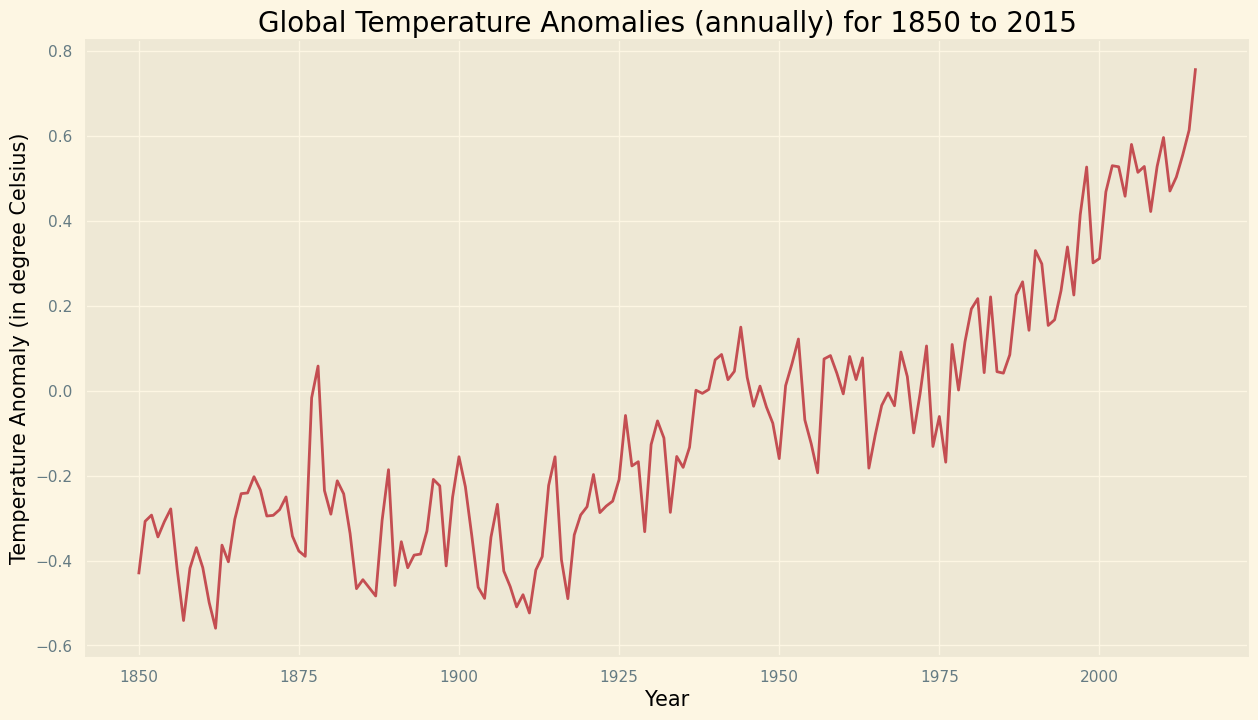

In [179]:
# Plotting the temperature Anomaly:
#print(plt.style.available) -> to see the numerous grid styles

plt.style.use('Solarize_Light2')
plt.figure(figsize = (15,8))
plt.plot(working_data['Temperature Anomaly'], 'r') # Temperature Anomaly in the Y-axis

plt.title("Global Temperature Anomalies (annually) for 1850 to 2015", fontsize = 20, color='black')
plt.xlabel("Year", fontsize =  15, color='black')
plt.ylabel("Temperature Anomaly (in degree Celsius)", fontsize =15, color='black')

plt.show()         
         

From the above plot, we can clearly see that the Earth has been warming over the years. The warming is more pronounced from about 1920 onwards, and it directly correlates with the booming of the Industrial Era. In 2015, the Earth was 0.76 degrees Celsius warmer than normal. The result above hence confirms the scientific consensus that the Earth is warming.

### NATURAL DISASTERS

In [180]:
# We will load the Natural Disaster CSV file, make a copy of it, and store it in a working dataframe.

origin_disaster_data = pd.read_csv("/home/aayan/Portfolio_Python/Climate_Change_Analysis/number_of_natural_disaster_events.csv")
working_disaster_data = origin_disaster_data.copy()

working_disaster_data.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [181]:
# We remove the 'Code' Column as it is insignificant for our analysis:
working_disaster_data.drop(['Code'], axis = 1, inplace = True)

# Checking the different types of 'Entity' Values:
working_disaster_data['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

The 'Entity' column contains 10 types of natural disaster entries and their summation, i.e., "All natural disasters". We will next rearrange the data according to the disaster categories for further analysis.

In [182]:
working_disaster_data = working_disaster_data.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
working_disaster_data.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


Since, it's very much clear that Global Warming doesn't affect the probability of impact by asteroids and meteorites, etc on Earth, that's why, the 'Impact' entity can be removed from the dataframe.

One more thing, there are several 'NaN' values, which could mean missing values or unreported disaster occurrences. For now, we'll replace them with 0, i.e., no disaster occurrence, and it would also benefit plotting the data by helping to create complete, continuous, and accurate visualizations.

In [183]:
# Removing the 'Impact' Column:
working_disaster_data.drop(['Impact'], axis = 1, inplace = True)

# Handling missing values and rename columns:
working_disaster_data.fillna(value = 0, inplace = True)
working_disaster_data = working_disaster_data.add_suffix(' (Occurrence)')

working_disaster_data.head()

Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


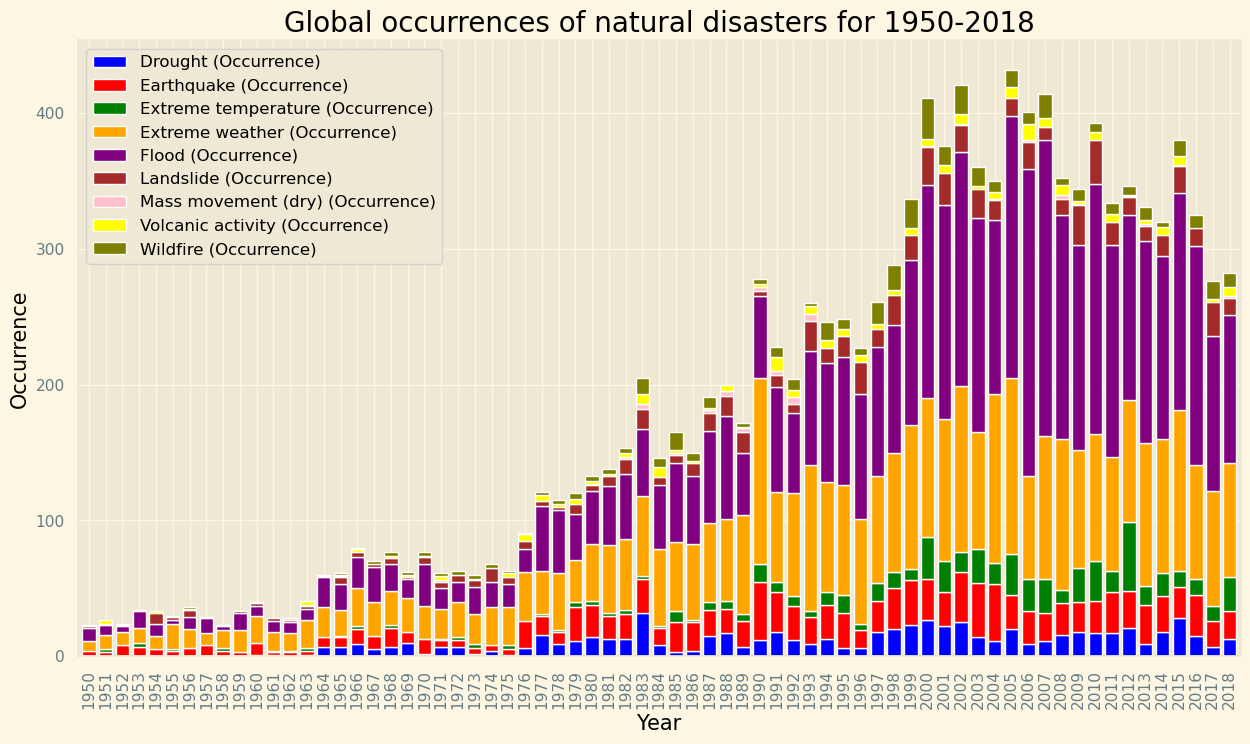

In [184]:
# Plotting the types of natural disasters occurences for 1950-2018:
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'yellow', 'olive']

# Next, we drop the 'All natural disasters (Occurrence)' column because we only want to show individual disaster types. We also filter the dataframe to only include data from 1950 onwards.
# All disaster types are stacked vertically for each year in the Bar chart.
working_disaster_data.drop(['All natural disasters (Occurrence)'], axis = 1).loc[1950: ].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2018', fontsize = 20, color='black')
plt.xlabel('Year', fontsize = 15, color='black')
plt.ylabel('Occurrence', fontsize = 15, color='black')
# loc=2 places it in the upper left corner of the plot.
# prop={'size': 12} sets the legend text size.
legend = plt.legend(loc = 2, prop = {'size' : 12})
for text in legend.get_texts(): # to change the text color to Black
    text.set_color('black') 

plt.show()

The bar plot above, with individual stacks for each disaster category, shows that the occurrence of floods has significantly increased over the years relative to other disasters. The next highest increase in occurrence is that of extreme weather, followed by earthquakes. The plot also shows that there has been a steady increase in the number of total natural disasters globally. This is more evident from the above plot.

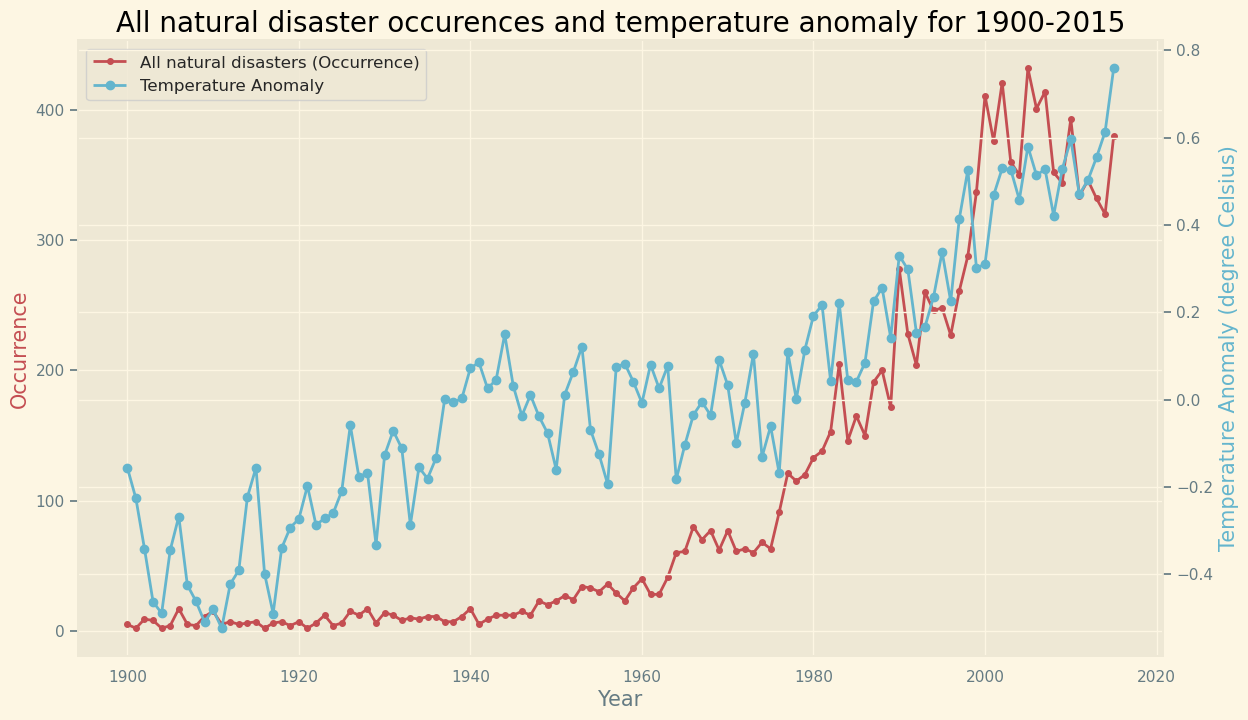

In [185]:
# Plotting all natural disaster occurrences and temperature anomaly together to do comparison:
fig, ax = plt.subplots(figsize = (14, 8)) # Left Y-axis/primary axis (ax): plots natural disaster occurrences in red.
ax2 = ax.twinx() #Right Y-axis (ax2): plots temperature anomaly in cyan.
#This allows plotting two datasets with different units/scales on the same timeline.



line1 = ax.plot(working_disaster_data.loc[:2015, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(working_data.loc[1900:, 'Temperature Anomaly'], '-co', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines] # This combines them into one lines list, and then extracts their labels.


plt.title('All natural disaster occurences and temperature anomaly for 1900-2015', fontsize = 20, color = 'black')
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature Anomaly (degree Celsius)', fontsize = 15, color = 'c')
ax.legend(lines, labels, loc = 0, prop = {'size':12}) # Combines legends from both axes and displays them together.
# loc=0: Auto-places the legend in the best spot.


plt.show()


The above plot indicates a positive correlation between temperature anomaly and the occurrence of natural disasters, especially after around 1940 when it starts becoming warmer than normal, natural disasters also start rising globally.

### ECONOMIC LOSSES CAUSED BY NATURAL DISASTERS

In [186]:
# We will load the Economic Damage caused by Natural Disaster CSV file, make a copy of it, and store it in a working dataframe.

origin_econ_data = pd.read_csv("/home/aayan/Portfolio_Python/Climate_Change_Analysis/economic_damage_from_natural_disasters.csv")
working_econ_data = origin_econ_data.copy()

working_econ_data.head()

,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [187]:
# Since the code column is insignificant for our analysis, we will remove it:
working_econ_data.drop(['Code'], axis = 1, inplace = True)

# Pivoting the dataframe:
working_econ_data = working_econ_data.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters (US$)')
working_econ_data.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,30000000.0,NaN,NaN,NaN,30000000.0,NaN,NaN,NaN,NaN,NaN,NaN
1901,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,480000000.0,NaN,NaN,NaN,NaN,480000000.0,NaN,NaN,NaN,NaN,NaN
1904,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# Now we will remove the other irrelevant columns and rename the other columns and handle the missing values

working_econ_data.drop(['Impact'], axis = 1, inplace = True)

working_econ_data.fillna(value = 0, inplace = True)
working_econ_data = working_econ_data.add_suffix(' (Economic Damage)')

working_econ_data.head()

Entity,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,
1900,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


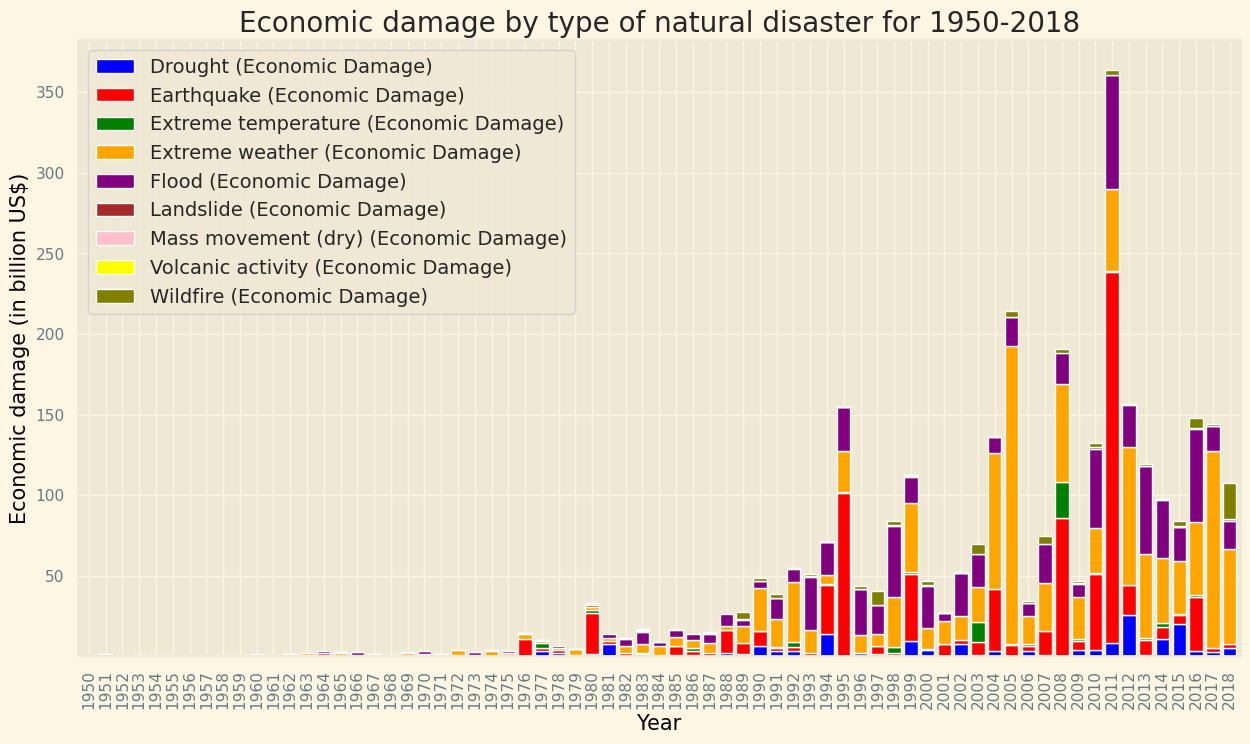

In [189]:
# Plotting the economic damage categorised by the type of natural disasters for 1950-2018:
# Removing the total column and filter for years 1950 onwards:
econ_damage_filtered = working_econ_data.drop('All natural disasters (Economic Damage)', axis=1).loc[1950:]

# Converting to billions from US Dollars: (more readable)
econ_damage_billion = econ_damage_filtered / 1e9
 
## Plot:
econ_damage_billion.plot.bar(stacked=True, width=0.8, figsize=(15, 8), color=colors) # Ensuring this matches number of columns



plt.title('Economic damage by type of natural disaster for 1950-2018', fontsize = 20)
plt.xlabel('Year', fontsize = 15, color = 'black')
plt.ylabel('Economic damage (in billion US$)', fontsize = 15, color = 'black')
plt.legend(loc = 2, prop = {'size': 14})

plt.show()

From the above plot, economic damage is highly variable as it depends on various factors such as the disaster type, disaster location, severity of the disaster, disaster management efforts, etc.

However, one obvious trend we can see here is that the total economic damage from all the disasters is generally increasing over the years. The main reason for this trend is the increase in disaster occurrences (correlated with temperature rise), although not all disasters contribute equally to the economic damage. Another reason for higher economic damage could be the overall increase in economic growth, which leads to more infrastructure, land use, etc.

### CREATING A CORRELATION TABLE TO MEASURE THE CORRELATION BETWEEN EACH ENTITY

In [190]:
# Combining the 3 main dataframes(working_data, working_disaster_data, working_econ_data) to make a correlation table:
combined_data = working_data.join([working_disaster_data, working_econ_data], how = 'inner')
combined_data.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.155631,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,30000000.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0
1901,-0.226214,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,-0.341214,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,-0.462964,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,480000000.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0
1904,-0.489131,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
correlation_table = combined_data.corr()
correlation_table.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,All natural disasters (Economic Damage),Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage)
Temperature Anomaly,1.000000,0.865128,0.750086,0.796451,0.738191,0.848536,0.841740,0.772180,0.257074,0.669120,...,0.647406,0.515849,0.346882,0.294110,0.588786,0.678628,0.353444,0.010518,0.215112,0.557517
All natural disasters (Occurrence),0.865128,1.000000,0.854789,0.903392,0.859863,0.969517,0.978128,0.894296,0.349152,0.788590,...,0.740809,0.550956,0.400397,0.335689,0.686369,0.759470,0.439097,-0.047811,0.203272,0.624099
Drought (Occurrence),0.750086,0.854789,1.000000,0.815286,0.684009,0.829133,0.785536,0.790511,0.398695,0.710884,...,0.578329,0.583563,0.293073,0.255171,0.525367,0.600423,0.518547,-0.068802,0.251909,0.515664
Earthquake (Occurrence),0.796451,0.903392,0.815286,1.000000,0.721105,0.917687,0.824128,0.778272,0.408753,0.708440,...,0.667560,0.509985,0.394882,0.321490,0.588992,0.663298,0.416438,-0.063196,0.263032,0.538465
Extreme temperature (Occurrence),0.738191,0.859863,0.684009,0.721105,1.000000,0.776985,0.870008,0.751340,0.165342,0.556775,...,0.680193,0.596794,0.316083,0.229073,0.704082,0.657396,0.296600,-0.033887,0.097393,0.569856


In the correlation table: 

1.0 = perfect positive correlation;
-1.0 = perfect negative correlation;
0 = no correlation between the two entities

We will check now how the temperature anomaly compares to everything.

In [192]:
# CHECKING CORRELATION WITH RESPECT TO TEMPERATURE ANOMALY:
combined_data.corr()['Temperature Anomaly']

Temperature Anomaly                        1.000000
All natural disasters (Occurrence)         0.865128
Drought (Occurrence)                       0.750086
Earthquake (Occurrence)                    0.796451
Extreme temperature (Occurrence)           0.738191
Extreme weather (Occurrence)               0.848536
Flood (Occurrence)                         0.841740
Landslide (Occurrence)                     0.772180
Mass movement (dry) (Occurrence)           0.257074
Volcanic activity (Occurrence)             0.669120
Wildfire (Occurrence)                      0.683839
All natural disasters (Economic Damage)    0.647406
Drought (Economic Damage)                  0.515849
Earthquake (Economic Damage)               0.346882
Extreme temperature (Economic Damage)      0.294110
Extreme weather (Economic Damage)          0.588786
Flood (Economic Damage)                    0.678628
Landslide (Economic Damage)                0.353444
Mass movement (dry) (Economic Damage)      0.010518
Volcanic act

## VISUALIZATION OF ALL THE INFORMATION ABOVE THROUGH A CORRELATION HEATMAP

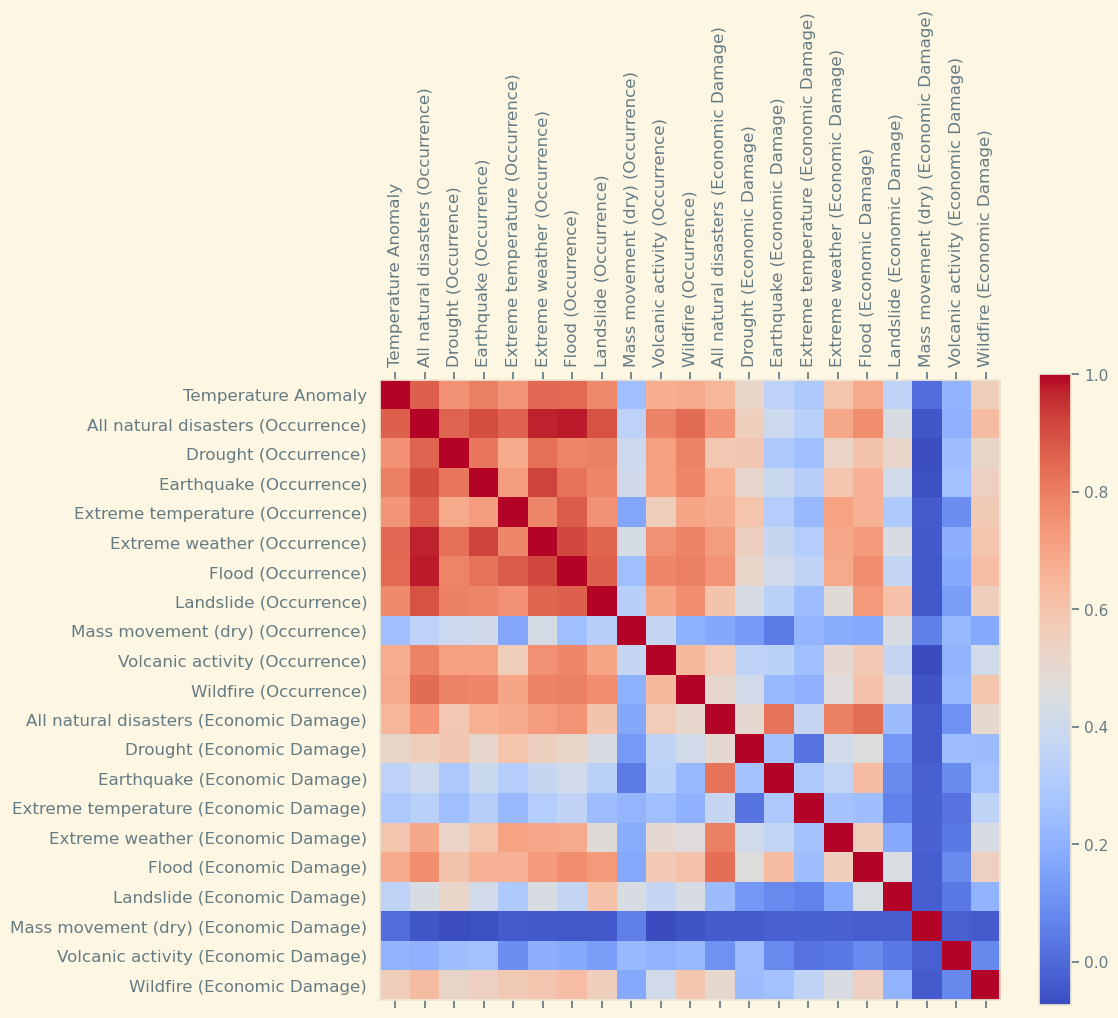

In [193]:
# Plotting correlation heatmap:
fig, ax = plt.subplots(figsize = (10, 10)) # Creating a new figure and axes using matplotlib
labels = [name for name in correlation_table.columns] # collecting the column names of our correlation matrix to use as axis labels

cax = ax.matshow(correlation_table, cmap = 'coolwarm') # matshow displays the matrix correlation_table as a grid of colors and cmap is used as Red-Yellow-Green colormap
cbar = fig.colorbar(cax, shrink = 0.82) # adding a color bar to the side to interpret the color scale

# setting the positions of the tick marks on the x-axis and y-axis of the heatmap:
ax.set_xticks(np.arange(len(labels))) # placing ticks on the x-axis at 21 positions 
ax.set_yticks(np.arange(len(labels))) # placing ticks on the y-axis at 21 positions 

# This prepares the heatmap to label the rows and columns at the correct positions.

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical') # rotation rotates x-axis labels vertically so they don’t overlap
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False) # disabling the gridlines

plt.show()

From the above heatmap, the correlation values confirm our analysis from the previous plots that the global temperature rise has a strong positive correlation with all types of natural disaster occurrences (except mass movement (dry)) and has a relatively lower correlation with economic damage.

Correlation Analysis Insights: The analysis reveals a very strong positive correlation (0.87) between the Temperature Anomaly and the Total Occurrence of Natural Disasters. Especially, Extreme weather and floods have the highest correlation with the Temperature Anomaly. However, the correlation between temperature and geophysical events like Volcanic Activity (0.67) and Earthquakes (0.80), while positive, is less direct and warrants a nuanced interpretation. 

Hence, we separate the climate-driven events (like floods, droughts, etc) from geophysical ones to test our primary hypothesis that the rising temperatures are directly correlated with an increase in climate-related hazards. This is a standard technique to reduce noise and strengthen our conclusion.

### ISOLATE CLIMATE-RELATED DISASTERS

In [194]:
# Listing the disaster types that ar direclty influenced by climate patterns:
climate_disaster_columns = ['Drought (Occurrence)', 'Extreme temperature (Occurrence)', 'Extreme weather (Occurrence)', 'Flood (Occurrence)', 'Landslide (Occurrence)', 'Wildfire (Occurrence)']


In [195]:
# Then, we create a new column in our combined_data dataframe:
# This column sums up the occurrences horizontally (axis=1) of only the climate-related disasters for each year.


combined_data['Climate-Related Disasters (Occurrence)'] = combined_data[climate_disaster_columns].sum(axis = 1)
combined_data

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,Drought (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage),Climate-Related Disasters (Occurrence)
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.155631,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+07,0.000000e+00,0.0,0.0,0.0,0.000000e+00,4.0
1901,-0.226214,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0
1902,-0.341214,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1.0
1903,-0.462964,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+08,0.0,0.0,0.0,0.000000e+00,5.0
1904,-0.489131,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,0.469953,334.0,17.0,30.0,16.0,84.0,156.0,17.0,0.0,6.0,...,8.142000e+09,2.302998e+11,7.811230e+08,5.087215e+10,7.075705e+10,0.0,0.0,104000000.0,3.137000e+09,298.0
2012,0.502786,346.0,21.0,27.0,51.0,90.0,136.0,13.0,1.0,1.0,...,2.548000e+10,1.853631e+10,1.528010e+08,8.573258e+10,2.579054e+10,0.0,0.0,0.0,1.000000e+09,317.0
2013,0.554869,332.0,9.0,29.0,14.0,105.0,149.0,11.0,1.0,3.0,...,1.087000e+09,9.112859e+09,1.000000e+09,5.238836e+10,5.478257e+10,0.0,8000000.0,0.0,1.072400e+09,298.0


In [196]:
# Now, we try to find out the correlation between the Temperature Anomaly and this new, more spcific category of disasters:
climate_correlation = combined_data[['Temperature Anomaly', 'Climate-Related Disasters (Occurrence)']].corr()

print('Correlation between Temperature anomaly and Climate-Related Disasters:\n')
print(climate_correlation)      


Correlation between Temperature anomaly and Climate-Related Disasters:

                                        Temperature Anomaly  \
Temperature Anomaly                                1.000000   
Climate-Related Disasters (Occurrence)             0.863602   

                                        Climate-Related Disasters (Occurrence)  
Temperature Anomaly                                                   0.863602  
Climate-Related Disasters (Occurrence)                                1.000000  


INTERPRETATION:

From the above result, we have calculated the correlation between the Temperature Anomaly and only the Climate-Related Disasters, and the value is 0.8636. Firstly, a correlation coefficient of +0.86 is extremely high. This strongly confirms our primary hypothesis. It shows that as the temperature anomaly increases, the number of climate-related disasters also increases in a very predictable way.

Now, for the subtle part, our previous correlation with all disasters was 0.8651. This new, more focused correlation is almost identical. I had hypothesized it might be stronger as it doesn't include the geophysical events, but the data is telling us something rather weaker (+0.8636) and more subtle. It implies that the geophysical disasters we removed also show a strong trend of increasing in our dataset over time.

Hence, this is a critical outcome and leads directly to the Reporting Bias Hypothesis. It is highly unlikely that global warming is causing more earthquakes. It is, however, very likely that our ability to detect, record, and report all types of disasters has improved dramatically over the last century. Therefore, this result strengthens the argument that the overall increase in all disaster data has a component of reporting bias. However, it does not weaken our main conclusion, because the physical link between warming and climate-related disasters is scientifically sound.

### NORMALISATION OF THE ECONOMIC DAMAGE DATA BY GLOBAL GDP

We have previously mentioned that an increase in economic damage isn't just due to more disasters, but also because there's more valuable infrastructure to be damaged. By normalizing the economic damage, it will enable us to account for this economic growth. By looking at economic damage as a percentage of the global economy (GDP), we can analyze whether disasters are becoming more destructive relative to our global wealth. 

For this analysis, we need global GDP data from 1960 to 2018, which we can extract from the following URL = "https://fred.stlouisfed.org/series/NYGDPMKTPCDWLD?utm_source=chatgpt.com" 



In [197]:
# We will load the Global GDP CSV file, make a copy of it, and store it in a working dataframe.

gdp_data = pd.read_csv("/home/aayan/Portfolio_Python/Climate_Change_Analysis/World_GDP_1960_2018_Billions.csv")
working_gdp_data = gdp_data.copy()
working_gdp_data.head()

,Year,World GDP (in billions)
0,1960,1371.947205
1,1961,1445.950587
2,1962,1550.597671
3,1963,1669.569736
4,1964,1830.168405


In [198]:
# Setting up the 'Year' column as the index:
working_gdp_data.set_index('Year', inplace = True)
working_gdp_data.head()

,World GDP (in billions)
Year,
1960,1371.947205
1961,1445.950587
1962,1550.597671
1963,1669.569736
1964,1830.168405


In [199]:
# Converting World GDP to absolute dollars (from billions) to match our damage data:
working_gdp_data['World GDP'] = working_gdp_data['World GDP (in billions)']*1e9
working_gdp_data.head()

,World GDP (in billions),World GDP
Year,,
1960,1371.947205,1.371947e+12
1961,1445.950587,1.445951e+12
1962,1550.597671,1.550598e+12
1963,1669.569736,1.669570e+12
1964,1830.168405,1.830168e+12


In [200]:
# Removing the previous 'World GDP (in billions)' column as it is of no use:
working_gdp_data.drop('World GDP (in billions)', axis = 1, inplace = True)
working_gdp_data.head()

,World GDP
Year,
1960,1.371947e+12
1961,1.445951e+12
1962,1.550598e+12
1963,1.669570e+12
1964,1.830168e+12


In [201]:
# Now, we merge up the GDP Data with our main dataframe (combined_data):
# # We use a 'left' join to keep all years from our combined_data and add GDP where available.
combined_data_with_gdp = combined_data.join(working_gdp_data, how = 'left')
combined_data_with_gdp.head()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage),Climate-Related Disasters (Occurrence),World GDP
Year,,,,,,,,,,,,,,,,,,,,,
1900,-0.155631,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN
1901,-0.226214,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1902,-0.341214,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
1903,-0.462964,8.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,...,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0,5.0,NaN
1904,-0.489131,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [202]:
# Here, we will calculate the Normalized Economic Damage:
# We calculate damage as a percentage of World GDP for the years where we have GDP data.
damage_col = 'All natural disasters (Economic Damage)'
gdp_col = 'World GDP'

# We create a new column, initialized with NaN:
combined_data_with_gdp['Normalized_Damage_Percent'] = float('NaN')

# Then, we create a mask for rows where GDP Data is available and not zero:
mask = combined_data_with_gdp[gdp_col].notna() & (combined_data_with_gdp[gdp_col] > 0)

# We will calculate the percentage only for those rows that have GDP Data:
combined_data_with_gdp.loc[mask, 'Normalized_Damage_Percent'] = \
(combined_data_with_gdp.loc[mask, damage_col] / combined_data_with_gdp.loc[mask, gdp_col]) * 100


combined_data_with_gdp.tail()

,Temperature Anomaly,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),...,Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Landslide (Economic Damage),Mass movement (dry) (Economic Damage),Volcanic activity (Economic Damage),Wildfire (Economic Damage),Climate-Related Disasters (Occurrence),World GDP,Normalized_Damage_Percent
Year,,,,,,,,,,,,,,,,,,,,,
2011,0.469953,334.0,17.0,30.0,16.0,84.0,156.0,17.0,0.0,6.0,...,7.811230e+08,5.087215e+10,7.075705e+10,0.0,0.0,104000000.0,3.137000e+09,298.0,7.408084e+13,0.491481
2012,0.502786,346.0,21.0,27.0,51.0,90.0,136.0,13.0,1.0,1.0,...,1.528010e+08,8.573258e+10,2.579054e+10,0.0,0.0,0.0,1.000000e+09,317.0,7.570585e+13,0.206975
2013,0.554869,332.0,9.0,29.0,14.0,105.0,149.0,11.0,1.0,3.0,...,1.000000e+09,5.238836e+10,5.478257e+10,0.0,8000000.0,0.0,1.072400e+09,298.0,7.787345e+13,0.153434
2014,0.613453,320.0,18.0,26.0,17.0,99.0,135.0,15.0,0.0,6.0,...,2.518000e+09,4.011407e+10,3.624024e+10,273000000.0,0.0,186000000.0,2.590000e+08,288.0,8.002034e+13,0.122181
2015,0.759036,380.0,28.0,23.0,12.0,118.0,160.0,20.0,1.0,6.0,...,9.400000e+07,3.305177e+10,2.108630e+10,8000000.0,0.0,600000000.0,3.439820e+09,350.0,7.547247e+13,0.111458


In [203]:
# Finally, we will re-run the correlation:
print("Correlation with Normalized Economic Damage:")
print(combined_data_with_gdp[['Temperature Anomaly', 'Normalized_Damage_Percent']].corr())


Correlation with Normalized Economic Damage:
                           Temperature Anomaly  Normalized_Damage_Percent
Temperature Anomaly                   1.000000                   0.391381
Normalized_Damage_Percent             0.391381                   1.000000


INTERPRETATION:

The economic analysis reveals a significant finding in the natural disaster damage impact. Initially, in examining the correlation between Temperature Anomaly and raw economic damage in dollar terms, it became moderately strong, roughly 0.65. What this reveals is an apparent trend in which rising temperatures coincide with rising monetary damages.

However, in order to account for global economic growth, damage data were normalized to be expressed as a percentage of annual world GDP. With this normalizing, the correlation between Temperature Anomaly and relative economic damage dropped significantly to 0.39.

This is a crucial finding. It suggests that while the absolute dollar cost of disasters is rising sharply, a substantial portion of that increase is tied to the fact that the global economy is larger and there is simply more valuable infrastructure to be damaged. The link between rising temperatures and the proportion of our global wealth lost to disasters is still positive, but much weaker than the raw numbers suggest.



### STATISTICAL TESTING

Now, we will consider testing whether our variables are normally distributed or not. For this, we are going to use the Shapiro-Wilk Normality Test, which is a type of non-parametric test. For this test, we assume that the data is normally distributed as the null hypothesis (H0), which implies P > 0.05. 

In [204]:
# Creating a list of the columns you want to test:
columns_to_test = {
    'Temperature Anomaly': 'Temperature Anomaly',
    'Climate Related Disaster Occurrence': 'Climate-Related Disasters (Occurrence)',
    'Normalized Economic Damage': 'Normalized_Damage_Percent'
}

print("Shapiro-Wilk Normality Test Results:\n")

# Run the test for each column and print the results
for name, column in columns_to_test.items():
    # The Shapiro function returns the test statistic and the p-value
    stat, p_value = shapiro(combined_data_with_gdp[column].dropna())
    
    print(f"--- {name} ---")
    print(f"P-value: {p_value:.4g}")
    
    if p_value > 0.05:
        print("Conclusion: The data is normally distributed (We have failed to reject H0).\n")
    else:
        print("Conclusion: The data is not normally distributed (We reject H0).\n")

Shapiro-Wilk Normality Test Results:

--- Temperature Anomaly ---
P-value: 0.02306
Conclusion: The data is not normally distributed (We reject H0).

--- Climate Related Disaster Occurrence ---
P-value: 1.118e-12
Conclusion: The data is not normally distributed (We reject H0).

--- Normalized Economic Damage ---
P-value: 1.362e-06
Conclusion: The data is not normally distributed (We reject H0).



We will test the 2 main correlations that we have discussed:

a) Temperature Anomaly vs. the frequency of Climate-Related Disasters.

b) Temperature Anomaly vs. the Normalized Economic Damage.

Note: For the test, we are going to use the data from 1960 onwards, as this is the period for which we have complete data for all variables, including GDP.


Even though we don't have a normal distribution, we will still test it with Pearson Correlation (a type of parametric correlation) just to see whether the results of both tests yield a similar result. 


# THEORY:
As part of our work to date, we've calculated correlation coefficients, which measure strength and direction in associations between two variables (e.g., Temperature Anomaly and Climate-related Disaster Occurrences). A figure near 1.0, like the 0.86 we calculated between temperature anomaly and climate-related disasters, indicates a strong positive correlation.

But correlation in and of itself can't reveal whether this result is "real" or if it could have happened solely due to sheer random chance. That's where we use the probability (p) value. The p-value tells us about the possibility of seeing our data's result if, in reality, there's no correlation between variables. In short, it tells us whether observed differences in one's study are likely due to chance or to an actual effect.

One common threshold for significance is if p is less than 0.05. It means that there is less than a 5% likelihood that the correlation that we observed is due to simple random chance. We can therefore conclude confidently that the relationship is statistically significant. We conclude, in turn, that the outcome is due to random possibility if p is equal to or more than 0.05.


### 1. Temperature Anomaly vs. Climate-Related Disasters (Occurrence) [Pearson Correlation]


In [205]:
# Filtering the data for the years 1960 onwards and removing any rows with missing data:
analysis_df_occurrence = combined_data_with_gdp.loc[1960:].dropna(subset=['Temperature Anomaly', 'Climate-Related Disasters (Occurrence)'])

# Calculating Pearson correlation coefficient and p-value:
# pearsonr is a function from scipy.stats. 

# Pearson correlation coefficient (r) (-1 to +1): This tells us how strong (in terms of strength and direction) the relationship is.
# +1 = positive linear correlation; -1 = negative linear correlation, i.e., alternate hypothesis (H1)
# 0 = no linear relationship, i.e., the null hypothesis (H0)

# probability(p) value: This tells us whether we can trust that the relationship is real (statistically).
# p < 0.05: Statistically significant; p ≥ 0.05: Not statistically significant


r_value_occurrence, p_value_occurrence = pearsonr(analysis_df_occurrence['Temperature Anomaly'], analysis_df_occurrence['Climate-Related Disasters (Occurrence)'])



In [206]:
# Printing the results in a clear format:
print("Correlation between Temperature Anomaly and Climate-Related Disasters:")
print(f"  - Pearson Correlation Coefficient: {r_value_occurrence:.4f}")
print(f"  - Probability value: {p_value_occurrence:.4g}") # Using .4g for scientific notation if needed

# Now, we will interpret the p-value:
if p_value_occurrence < 0.05:
    print("\nConclusion: The correlation is statistically significant.")
else:
    print("\nConclusion: The correlation is not statistically significant.")


Correlation between Temperature Anomaly and Climate-Related Disasters:
  - Pearson Correlation Coefficient: 0.9113
  - Probability value: 1.837e-22

Conclusion: The correlation is statistically significant.


INTERPRETATION: The p-value is extremely small (well below 0.05). This confirms that the positive trend (i.e., r = 0.9113) in correlation between rising temperature anomalies and increasing percentages of climate disaster events is, in reality, statistically significant. Hence, there is an extremely low possibility that this trend is caused by a random occurrence. Also, we have witnessed that the r value is not zero, hence we have rejected the null hypothesis!

### 2. Temperature Anomaly vs. Normalized Economic Damage (% of GDP) [Pearson Correlation]


In [207]:
# Filtering the data for the years 1960 onwards and removing any rows with missing data:
analysis_df_damage = combined_data_with_gdp.loc[1960:].dropna(subset=['Temperature Anomaly', 'Normalized_Damage_Percent'])

# Calculating Pearson correlation and p-value:
r_value_damage, p_value_damage = pearsonr(analysis_df_damage['Temperature Anomaly'], analysis_df_damage['Normalized_Damage_Percent']) 


In [208]:
# Printing the results in a clear format:
print("Correlation between Temperature Anomaly and Normalized Economic Damage:")
print(f"  - Pearson Correlation Coefficient: {r_value_damage:.4f}")
print(f"  - Probability value: {p_value_damage:.4f}")

# Now, we will interpret the p-value:
if p_value_damage < 0.05:
    print("\nConclusion: The correlation is statistically significant.")
else:
    print("\nConclusion: The correlation is not statistically significant.")

Correlation between Temperature Anomaly and Normalized Economic Damage:
  - Pearson Correlation Coefficient: 0.3914
  - Probability value: 0.0029

Conclusion: The correlation is statistically significant.


INTERPRETATION: The p-value here will be less than 0.05. That is, even if the correlation (0.39) isn't strong, it's still statistically significant. That's a crucial point; it provides evidence that indeed there's a valid, not-at-random pattern that disasters take proportionately increasing shares of our global wealth as the planet warms, even after accounting for economic growth. Also, we have witnessed that the r value is not zero, hence we have rejected the null hypothesis!

# THEORY:
Finally, we will test our data with Spearman's Rank Correlation, which assumes data to be not normally distributed. Instead of looking at the actual data values (like disaster counts or damaged costs), this test looks for the ranks of those values. It converts the values to ranks (1st, 2nd, 3rd, etc.) and then performs a correlation on those ranks. Because it uses ranks, it is much less sensitive to the extreme outliers/anomalies we have in our economic damage data. This assesses the strength of a monotonic relationship. This means it checks if one variable tends to increase as the other variable increases, even if that relationship isn't a perfect straight line.

In this test, the null hypothesis(H0) is that there is no monotonic relationship between the two variables i.e., ρ (rho) = 0 
where ρ is the Spearman's rank correlation coefficient.


### 3. Temperature Anomaly vs. Climate-Related Disasters (Occurrence) [Spearman's Rank Correlation] 

In [209]:
# Creating a new DataFrame for analysis from 1960 onwards:
analysis_df = combined_data_with_gdp.loc[1960:].dropna()


# Finding Spearman correlation for our key variable:
spearman_temp_vs_occurrence = analysis_df['Temperature Anomaly'].corr(analysis_df['Climate-Related Disasters (Occurrence)'], method='spearman')
print(f"ρ (Temperature Anomaly vs. Climate-Related Disasters Occurrences): {spearman_temp_vs_occurrence:.4f}")


ρ (Temperature Anomaly vs. Climate-Related Disasters Occurrences): 0.8949


 ### 4. Temperature Anomaly vs. Normalized Economic Damage (% of GDP) [Spearman's Rank Correlation]

In [210]:
# Creating a new DataFrame for analysis from 1960 onwards:
analysis_damage_df = combined_data_with_gdp.loc[1960:].dropna()


# Finding Spearman correlation for our key variable:
spearman_temp_vs_damage = analysis_damage_df['Temperature Anomaly'].corr(analysis_damage_df['Normalized_Damage_Percent'], method='spearman')
print(f"ρ (Temperature Anomaly vs. Normalized Damage): {spearman_temp_vs_damage:.4f}")


ρ (Temperature Anomaly vs. Normalized Damage): 0.4504


INFERENCE: 

We first checked for the association among the variables by using a Pearson correlation that showed a high linear association between the measures for Temperature Anomaly and Climate-Related Disaster Occurrences (r ≈ 0.91). However, because the data was found to be non-normally distributed, we then undertook a more powerful, non-parametric Spearman rank correlation. The Spearman correlation confirmed the availability of a high monotonic association (ρ ≈ 0.89) and therefore provided robust evidence that with rising global temperatures, occurrences of climate-related natural disasters always tend to rise. 

Similarly, the association between Temperature Anomaly and Normalized Economic Damage was evaluated. The Pearson correlation showed a moderate linear relationship (r ≈ 0.39), while the Spearman correlation (ρ ≈ 0.45) suggested a slightly stronger monotonic trend. Together, these results support the inference that rising global temperatures are associated with increasing economic damages from climate-related disasters.


NOTE:

1) Since our Normalized_Damage_Percent column is empty (NaN) for all years before 1960, the corr() function automatically ignores those pre-1960 rows and computes the correlation only on the overlapping data, which starts in 1960. Hence, we can do the analysis without explicit filtering. For having a better, smoother flow, I am considering filtering the data post-1960 for now. 

2) For Temperature vs. Climate-Related Occurrences, we have to take all of the data post 1960.


### Discussion & Limitations

A rigorous analysis acknowledges the limitations and conditions of its results. The critical points for this project are:

Correlation vs. Causation: This study exhibits a robust statistical connection between increasing temperatures and the frequency of disasters. Causality isn't established by it, however. While the physical mechanism is well-known within the field of climate science, this exploratory study by itself simply measures the association.

Data Reporting Bias: The dataset for disasters reveals an abrupt spike in the reporting for the past fifty years. The pattern is probably exaggerated by advances in international communication, detection technology, and data reporting standards, such that not all the rise could be due solely to impacts from climate.

Methodological Robustness: The main data variables were found not to be normally distributed. In light of this, the analysis was verified by the non-parametric Spearman rank correlation, which confirmed the monotonic relationships without reliance on the assumption of normality and, therefore, consolidated the results.

### PROJECT CONCLUSION

This exploratory data analysis provides strong, data-driven evidence of the link between climate change and the increasing frequency of natural disasters.

The strongest conclusion here is that there is a strong, positive association between the planetary-scale Temperature Anomaly and the incidence of Climate-Related Disasters, which is verified by Spearman correlation coefficient ρ ≈ 0.89. This reveals a regular and statistically significant rise in the rate of dangerous occurrences with planetary warming.

Economic analysis provides a more nuanced picture. Although there is a modest positive correlation between warming and Normalized Economic Damage (ρ ≈ 0.45), the correlation is weaker than with frequency of disasters. This implies that even though costs are increasing, an important cause of the pattern is the expansion of the global economy and the value of exposed infrastructure.

In short, the statistics overwhelmingly prove that a hotter world is experiencing more consistent pounding by nature disasters, which is having a consistent and measurable, even if complicated, impact upon the global economy.